# Example for Lift Analysis

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from wingstructure import Wing, LiftAnalysis, LiftAndMomentAnalysis
import numpy as np

## Definition of wing

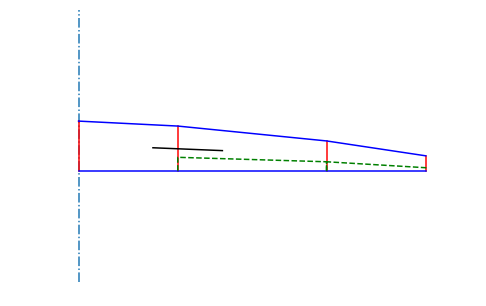

In [2]:
span_positions = [0, 2, 5, 7]
chord_lengths = [1, 0.9, 0.6, 0.3]
offsets = [0, 0.1, 0.4, 0.7]
twists = [0]*4
airfoils = [None]*4

twists2 = [0, 0, np.deg2rad(-1), np.deg2rad(-2)]

plt.figure(figsize=(8,5))

wing = Wing.create_from_planform(span_positions, chord_lengths, offsets, twists, airfoils);
wing.set_root_pos(0.0)
wing.set_airbrake(1.5,2.9)
wing.set_flap('flap', 2, 5,[0.3,0.3])
wing.set_flap('flap2', 5, 7, [0.3,0.2])

wing.plot()
plt.savefig('wing.png')

## Define analysis object and calculate distributions

/home/jonathan/Dokumente/Akaflieg/wingstructure/wingstructure/analysis.py:23: UserWarning: No airfoil database defined, using default airfoil.
  warn('No airfoil database defined, using default airfoil.')


0.8
1.08045067979
[ 0.79955878  0.80044122]


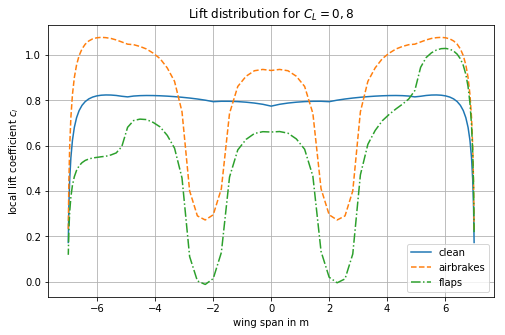

In [3]:
liftana = LiftAnalysis(wing)

span_pos = liftana.calc_ys

α, distribution = liftana.calculate(C_L=0.8)
α_ab, distribution_ab = liftana.calculate(C_L=0.8, air_brake=True)
α_qr, distribution_q = liftana.calculate(C_L=0.8, 
            flap_deflections={'flap2': [np.radians(5),np.radians(-5)]})

plt.figure(figsize=(8,5))
plt.plot(span_pos, distribution, label='clean')
plt.plot(span_pos, distribution_ab, '--', label='airbrakes')
plt.plot(span_pos, distribution_q, '-.', label='flaps')
plt.xlabel('wing span in m')
plt.ylabel('local lift coefficient $c_l$')
plt.title('Lift distribution for $C_L = 0,8$')
plt.grid()
plt.legend()
plt.savefig('Liftdistribution.png')